<a href="https://colab.research.google.com/github/Vikram310/Courses/blob/main/02_ForwardAndBackprop_RevisionNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference


## Content



- **How to create a model that helps in multiclass classification**
    - Notations

- **Softmax classifier**

- **Categorical Cross entropy**

- **How to train a NN?**
    - Forward Prop
    - Backward Prop

In [ ]:
from category_encoders import TargetEncoder

ModuleNotFoundError: ignored

***

Lets start working towards our goals that we mentioned earlier

## How to create a model that helps in our multi-class classification?

Coming back to the problem at hand.

> **Our data consists of 3 classes.**

#### Question: Can we use simple logistic regression to classify 3 classes?

No. We can only represent the simple Logitic Regression as a single-neuron model. i.e. predicting 2 classes.

#### Question: How can we modify the existing network to account for multiclass classification ?

Perhaps we can use multiple simple LogReg units (LRUs).



So, instead of using single model,
- we train multiple models

<center><img src='https://drive.google.com/uc?id=1cKo51V8wHKr4iCp3EX-NompxGhU7txGT' width="700"></center>







### Can we do this using a single model ?

Recall multi-class classification.
- We calculated the probability that a given data point belongs to class A, B or C repectively.
- Then, we returned the class with highest probability as the answer.




**This gives us the intuition that perhaps, our output layer should have 3 outputs. One for each class.**

So we can have a NN that looks like:-


<center><img src='https://drive.google.com/uc?id=131k2Wo-rcM6w8ZB7twLi2_h4-UKs5ILI' width="700"></center>





Do notice that
- we have same number of outputs (3 outputs)
- and same number of connections


The difference here is that
- computation is happening together

So, instead of having weight vector,
- we'll have weight matrix multiplying with data matrix.

We'll see it in code later.

A model formed by utilising multiple neurons is called a **Neural Network (NN)**.

Let's learn some notation to make our life easy.

### Notations



####  **Inputs**
 - We have two features for each datapoint: $x_{i1}$ and $x_{i2}$


#### But we have m datapoints?

#### Question: How did we represent m datapoints?

Ans: As a matrix where each row represent a datapoint
$
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{i2} \\
...  & ...  \\
x_{m1} & x_{m2}
\end{bmatrix}$



#### **Neuron**

- Neuron is represented using $f_i$ where
    - i refers to the neuron number

For example: $f_1$ means 1st neuron


#### **Weights**

- Weights are defined by notation: $w_{ij}$ where
    - i is the source neuron
    - j is the destination neuron

Let's define the weight associated with input $x_{i1}$, going to neuron 2, $f_2$ (say) as: $w_{12}$
 - Similarly, we define other weights values as $w_{11}, w_{12}, w_{13}, w_{21}, w_{22}, w_{23}$





####  **Bias**
 - Each neuron will have a bias term associated with it ($b_i$): $b = \begin{bmatrix}
b_1 \space
b_2  \space
b_3
\end{bmatrix}$



#### **z value**
$ $
- z value represent the linear operation i.e additive multiplication of inputs with their respective weights
    - $z_1 =w_{11}. x_{i1}  + w_{21}. x_{i2}$
    - $z_2 =w_{12} .x_{i1}  + w_{22}.x_{i2}$
    - $z_3 = w_{13} .x_{i1} + w_{23}.x_{i2}$
  





#### **Output**
 - Each neuron will apply it's activation function on the z values to outputs: $a^1_1, a^1_2, a^1_3$


<center><img src='https://drive.google.com/uc?id=1LDBuwe2xUQ_CF9ymiHvxzb2ojuYq16oz' width="800"></center>











#### Q. What is the problem with this formulation?



#### What if the model predicts >0.5 for more than one of the classes?



<center><img src='https://drive.google.com/uc?id=10HtCW-GFURe89gFpN2OwcC7Pj1xddHOb' width="800"></center>


- Model will predict the presence of multiple classes in the output - [1, 1, 0], [1, 1, 1], [1, 0, 1]

#### But how can multiple outputs be 1 ?

Recall that we are taking sigmoid of output
- range of $σ ∈ [0,1]$
- and we have sigmoid for each class.

Hence, each probability can be > 0.5 and therefore multiple class labels can be 1.

But, **We want these probabilities values to sum to 1, as the we had in Logistic Regression (p and 1-p)**.

<hr style="border:1px solid gray"> </hr>

## Softmax classifier



#### What constraint do we want on your output probabilities ?

Consider three outputs - $z_{1}$, $z_{2}$, $z_{3}$

- We want a function that should map $z_{1}$, $z_{2}$, $z_{3}$ to output such that
    - sum of output probabilities = 1

#### How can we map the outputs of three neurons in the last layer such that they sum upto 1?
- One such function is a **softmax function**

where
$$p_i = \frac {e^{z_i}} {\sum^k_{i =0} e^{z_i}}$$

Here, $p_i$ refers to the prob. of datapoint belonging to class i
- The denominator here is the normalisation term, to make $p_{1}+ p_{2}+ p_{3}= 1$

<br>

So, softmax can be thought of as sigmoid-like function for multiclass setting.


#### <font color ='red'>(Optional) </font> Question: But why not directly use $\frac{z_i}{\sum^k_{i=0} {z_i}}$? Why to raise the $z$ to power of exponential?

**Intuitive reason** - Ensures that values are **non-negative**, and lie only between 0 and 1.
- as the value of $z_i$ ranges from -∞ to ∞

<br>

Besides this, softmax function has some other desirable properties
1. Nice diferentiable $\frac{de^x}{dx} = e^x$
2. The output probabilities can be interpreted as log likelihoods (log odds)

Lets redraw the flow for an input data-point belonging to class C

![picture](https://drive.google.com/uc?export=view&id=12QEBrbkVaZiK-eXpGC9xI5xTNxjshk8U)


If we were to just use normalized z values instead of exponential
- the ratio of prob would be 1:3:6.

- However, softmax pushes the probability of largest number closer to 1. Hence, the term soft-max



So, we decide to keep **softmax** as the activation function in our NN.

Softmax calculator: https://keisan.casio.com/exec/system/15168444286206

---

We know we can train a simple Logistic Reg model using SGD and all, but

## How to train a NN?



Lets first define some variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 20.6MB/s]


,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [ ]:
import numpy as np

# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [ ]:
d = X.shape[1] # 2 - dimensionality, number of features
n = len(np.unique(y)) #3 - number of classes
m = X.shape[0] # number of examples
print(d, n, m)

2 3 300



#### Question: How many coef parameters $W$ will this system (of three LR/neurons) will have?


- We have 2 features $x_1$ and $x_2$ and which going into 3 LRs --> $d=2$
- Notice that #LRUs/#neurons in last layer = number of classes --> $n = 3$
- Thus, we will have
 - 2 $w$s for LR1, and
 - 2 $w$s for LR2, and
 - 2 $w$s for LR3,

Therefore a total of: $6$



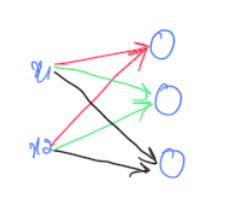


#### Question: What should be the shape of W?




Before deciding on the shape of W, let's take a look at the data matrix, and the output matrix.


> **Data Matrix**

We have a total of $m$ training examples. Each of which contains of $d=2$ features.

So, we have a data matrix $X$, that has the shape: **m x d**

<br>

> **Output matrix**

We know that we're getting 3 values as outputs: probabilities of the data point belonging to class A, B or C respectively.

Let $n=3$.

Therefore, we will get 3 output values for all $m$ examples.

Hence, shape of output matrix is: **m x n**

<br>

> **Weight matrix**

Hence, in order to get the output matrix, as a dot product of data and weight matrices, the shape of weight matrix has to be: **d x n**

$w^1 = \begin{bmatrix}
w_{11} & w_{12} & w_{13}\\
w_{21} & w_{22} & w_{23}
\end{bmatrix}_{dxn}$

<center><img src='https://drive.google.com/uc?id=1xop0_R5WK6_IBR_k_SDc_4jZV22fQaQf' width="800"></center>




#### Question: How many bias parameters $b$ will this system (of three LR/neurons) have?

- $n=3$ LRUs --> 1 bias term per LRU, thus $n$ bias terms.
- The bias term has to be added to the dot product of $X.W$.
- Therefore, the shape of bias matrix should also be: **m x n**

However, the value of bias will not change for different data points.
- The same bias values can be broadcasted for m examples.
- Therefore, the shape of bias matrix becomes: **1 x n**


#### Vectorized Implementation
![picture](https://drive.google.com/uc?export=view&id=1nQjWBk9q5_2YUMJtM8o8-ZLMOFFrmi_-)


  
<hr style="border:1px solid gray"> </hr>
  
### Lets train this Softmax Classifier using Gradient Descent

Let's implement the process of training this model using the process we followed earlier


1. Initialise parameters: `W` and `b` matrices
2. Calculate the output using the hypothesis.
3. Calculate the error `J`
4. Repeat until `J` converges
 - update $w_i = w_i - lr* \frac{\partial J}{\partial w_i}$
 - calculate the output using hypothesis and updated params
 - calculate the error `J`


**Step 1**

#### Let's initialise the parameters

In [ ]:
# initialize parameters randomly
W = 0.01 * np.random.randn(d,n)
b = np.zeros((1,n))

**Step 2**

#### Forward propagation

#### Now, lets calculate the output using the hypothesis

We will break this is into three parts
1. calculate `z` using $XW$
2. Apply Softmax on `z`
 - Raising z to exponential $e^z$ => `exp_z`
 - Normalising

Let's compute the z scores

In [ ]:
# compute scores for a linear classifier
z = np.dot(X, W) + b
print(z.shape) # should be mXn = #examples X #output

(300, 3)


Lets raise these scores to base $e$, and normalise them to get probabilities

In [ ]:
exp_z = np.exp(z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True) # explain why axis=1 we have to do all columns

Lets represent this process using a simple computation graph using the matrices.

Here `s` represents softmax funtion



<center><img src='https://drive.google.com/uc?id=1rABeqxpwN2VtSF-J4GNo1MSA9UVPXS4g' width=600></center>




---

## Categorical Cross entropy

#### Question: What loss did we use for logistic regression ?

Ans: Log loss

$Log-loss$ = $y_i.log(ŷ_i) + (1 - y_i).log(1 - ŷ_i)$

#### Question: Can we use this log-loss for multi-class setting ?

**No**. Logloss only deals with binary setting as $ŷ$ over there represent prob. of datapoint belonging to class 1.

We need a loss that can cater to the multi class setting. Let's define a loss

Suppose we have a point $x_i$
- it can belong to one of the k classes i.e. total number of classes are $k$
- Let $P_{ij}$ be the probab. of it belonging to $j^{th}$ class where $∀ j: 1 → k$





#### How will $y_i$ be represented?

$y_i$'s will be **one hot encoded.**

For example: If $y_i$ = 2 i.e. it belong to class 2.
- then only $y_{i2}$ = 1
- rest will be 0

i.e. [0, 1, 0]

**Cross Entropy ($CE_i$)** for $i^{th}$ datapoint will be:

>$CE_i$ = $-∑^k_{j =1}y_{ij}log(P_{ij})$

#### What happens to Cross entropy when k =2? (number of classes = 2)?


When k =2 i.e. class 1 and class 2, CE becomes

$CE_i$ = $- [y_{i1}log(P_{i1}) + y_{i2}log(P_{i2})]$

where
- $y_{i1}, y_{i2}$ are OHE target label
- $P_{i1}, P_{i2}$ are the probab. of datapoint belonging to class 1 and class 2 resp.

Suppose the datapoint belongs to class 1.
- In that case,
    - $y_{i1}$ = 1
    - $y_{i2}$ = 0

Hence, we can write
- $P_{i2}$ as ($1 - P_{i1}$)
- $y_{i2}$ as ($1 - y_{i1}$)

So, we are basically extending log loss to multiclass setting

Do NOTE that,
- Logloss is also known as **Binary Cross entropy**





To summarize,
- In binary setting
    - we use Sigmoid for probability
    - and Binary CE/logloss as loss function

- In multiclass setting,
    - we use softmax to compute class probabilities
    - and Cross entropy as loss function

**Step 3:**
#### Calculate the loss.
- Let's calculate **cross-entropy error**
 - It simplifies to taking log of predicted probability for the actual class
 - Why? Because the other terms will become $y_i*log(\hat{y}_i)$ terms will become zero on multiplying $y_i=0$
 - Lets calculate cross-entropy error for each sample, and call it `error`
 - The full loss is then the average of these log probabilities to compute the loss


In [ ]:
[range(m), y]

[range(0, 300),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2,

In [ ]:
# -np.log(
# probs[range(m), y]
    # )
exp_z = np.exp(z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
probs[range(m), y]

array([0.33333333, 0.33333385, 0.3333282 , 0.33332967, 0.33333399,
       0.33333004, 0.33331736, 0.33332072, 0.33332576, 0.33331307,
       0.33331791, 0.33331568, 0.33331181, 0.33331876, 0.33330128,
       0.33328589, 0.3332835 , 0.33327067, 0.33327823, 0.33325459,
       0.33324686, 0.33326745, 0.33324615, 0.33324692, 0.33322789,
       0.33323375, 0.33322445, 0.33320969, 0.33319012, 0.33321439,
       0.33318643, 0.33317534, 0.33315598, 0.33314969, 0.33315048,
       0.33314171, 0.33313509, 0.33312669, 0.33312193, 0.33311618,
       0.33311535, 0.33311591, 0.33310833, 0.33309371, 0.33309127,
       0.33313577, 0.33310123, 0.33307923, 0.33307459, 0.33307883,
       0.33305435, 0.33308783, 0.33307942, 0.33304443, 0.33308279,
       0.3331029 , 0.33308512, 0.33311225, 0.33312455, 0.33314497,
       0.33313373, 0.33329439, 0.33320567, 0.33314358, 0.33316875,
       0.33314303, 0.33321668, 0.33323278, 0.33315841, 0.33314651,
       0.33322197, 0.33329916, 0.33318067, 0.33314063, 0.33324

In [ ]:
probs

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333385, 0.33333802, 0.33332812],
       [0.3333282 , 0.33335732, 0.33331448],
       [0.33332967, 0.33336051, 0.33330983],
       [0.33333399, 0.33335584, 0.33331016],
       [0.33333004, 0.33337189, 0.33329807],
       [0.33331736, 0.33340642, 0.33327622],
       [0.33332072, 0.33340594, 0.33327333],
       [0.33332576, 0.33340059, 0.33327365],
       [0.33331307, 0.33343541, 0.33325152],
       [0.33331791, 0.33343126, 0.33325083],
       [0.33331568, 0.33344262, 0.33324171],
       [0.33331181, 0.33345759, 0.3332306 ],
       [0.33331876, 0.333448  , 0.33323325],
       [0.33330128, 0.33349322, 0.3332055 ],
       [0.33328589, 0.33353039, 0.33318371],
       [0.3332835 , 0.33354212, 0.33317439],
       [0.33327067, 0.33357207, 0.33315726],
       [0.33327823, 0.33356643, 0.33315534],
       [0.33325459, 0.33361329, 0.33313212],
       [0.33324686, 0.33363274, 0.3331204 ],
       [0.33326745, 0.33360821, 0.33312433],
       [0.

In [ ]:
def loss(y, probs):
    m = y.shape[0]    #dz = probs
    error = -np.log(probs[range(m), y])
    return np.sum(error)/m
loss(y, probs)

1.0980003261250324


![picture](https://drive.google.com/uc?export=view&id=10RpkDV24RUonN49GjuZSW3wWsLkf0wRd)

## Backward propogation

We had the following NN for our multiclass classification

<center><img src='https://drive.google.com/uc?id=1LDBuwe2xUQ_CF9ymiHvxzb2ojuYq16oz' width="800"></center>










Let's draw computational graph for this



<center><img src='https://drive.google.com/uc?id=1B9cHNnwhrLp2tJlle8TmCktltlbtey3Z' width=600></center>





#### Question: How did we decrease the loss in Logistic Regression?

- We calculate partial derivative of J wrt each W and b.
- And then we iteratively updated the params values of $W$ and $b$
- What does the partial derivative explain inituitively? How does J change with a small change in any param?

Problem: **We cannot directly calculate dW and db here**

- But what we can see is the error J is directly dependent on `p`, so we can calculate $\frac{\partial J}{\partial p_i}$ directly
- Further, the `p` in-turn  depend on `z`, and `z` is of course dependent on `W` (and `b`).

#### Lets break this down using chain rule  




<center><img src='https://drive.google.com/uc?id=1b_cQdk8t8YR2GBs78pDFYXZM-dRYwZPJ' width=700></center>





$$\frac{\partial J}{\partial w} =  \frac{\partial J}{\partial z} \frac{\partial z}{\partial w}$$

We can see from the picture that $\frac{\partial J}{\partial z}$ can be calculated using

$$\frac{\partial J}{\partial w} =  \frac{\partial J}{\partial p} \frac{\partial p}{\partial z} \frac{\partial z}{\partial w}$$

- Since, J (cost function) is the final function we want to optimise, we would come across a lot of intermediate calculations like $\frac{\partial J}{\partial <var>}$.
- In Python, we will represent gradients of J, $\frac{\partial J}{\partial w}$ as `dw`.
- And the equation $\frac{\partial J}{\partial w} =  \frac{\partial J}{\partial z} \frac{\partial z}{\partial w}$ can be represented as
$$dw =  dz  \frac{\partial z}{\partial w}$$

Since, we are moving from right to left across the computational graph, we call this process backpropagation.

<hr style="border:1px solid gray"> </hr>

### Let's calculate gradients using backpropagation

- We previously calculated $\frac{\partial z}{\partial w}$ in LR - since $z=w^Tx$, $\frac{\partial z}{\partial w}=x$
- Now, we need to calculate `dz`, $dz=\frac{\partial J}{\partial p} \frac{\partial p}{\partial z}$

Turns out that the result for `dz` has a very neat and intuitive solution (won't get into derivation)

$$dz = (p_k - I (i=k))$$

- First, the second term is called an **Indicator Function**,
    - where p_k  is the prob. of class K
    - it is 1 when `i==k`, else 0.
- Suppose `probs = [0.2, 0.3, 0.5]`, and that the correct class was the middle one  (0.3).
- According to the formula, gradients would be `dz = [0.2, -0.7, 0.5]`
- If we were saving ground truth, y,  as one-hot encoded vectors, we could have done this by just doing $p -y$

We won't go into its derivation, but lets intuitively understand this

<br>

#### Why are we subtracting 1 only from the probability of true class?
- The use of subtracting 1 from the true class is to make it derivative negative.
- For the true class (middle), increasing its probability values will decrease the error (0.3 --> -0.7) - aligns with goal.
- For other values, first and last, increase (or keeping it same) their probability values will increase the error - aligns with goal.

In [ ]:
probs

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333385, 0.33333802, 0.33332812],
       [0.3333282 , 0.33335732, 0.33331448],
       [0.33332967, 0.33336051, 0.33330983],
       [0.33333399, 0.33335584, 0.33331016],
       [0.33333004, 0.33337189, 0.33329807],
       [0.33331736, 0.33340642, 0.33327622],
       [0.33332072, 0.33340594, 0.33327333],
       [0.33332576, 0.33340059, 0.33327365],
       [0.33331307, 0.33343541, 0.33325152],
       [0.33331791, 0.33343126, 0.33325083],
       [0.33331568, 0.33344262, 0.33324171],
       [0.33331181, 0.33345759, 0.3332306 ],
       [0.33331876, 0.333448  , 0.33323325],
       [0.33330128, 0.33349322, 0.3332055 ],
       [0.33328589, 0.33353039, 0.33318371],
       [0.3332835 , 0.33354212, 0.33317439],
       [0.33327067, 0.33357207, 0.33315726],
       [0.33327823, 0.33356643, 0.33315534],
       [0.33325459, 0.33361329, 0.33313212],
       [0.33324686, 0.33363274, 0.3331204 ],
       [0.33326745, 0.33360821, 0.33312433],
       [0.

In [ ]:
dz = probs

In [ ]:
0.33333333 - 1

-0.66666667

In [ ]:
probs[range(m),y]

array([0.33333333, 0.33333385, 0.3333282 , 0.33332967, 0.33333399,
       0.33333004, 0.33331736, 0.33332072, 0.33332576, 0.33331307,
       0.33331791, 0.33331568, 0.33331181, 0.33331876, 0.33330128,
       0.33328589, 0.3332835 , 0.33327067, 0.33327823, 0.33325459,
       0.33324686, 0.33326745, 0.33324615, 0.33324692, 0.33322789,
       0.33323375, 0.33322445, 0.33320969, 0.33319012, 0.33321439,
       0.33318643, 0.33317534, 0.33315598, 0.33314969, 0.33315048,
       0.33314171, 0.33313509, 0.33312669, 0.33312193, 0.33311618,
       0.33311535, 0.33311591, 0.33310833, 0.33309371, 0.33309127,
       0.33313577, 0.33310123, 0.33307923, 0.33307459, 0.33307883,
       0.33305435, 0.33308783, 0.33307942, 0.33304443, 0.33308279,
       0.3331029 , 0.33308512, 0.33311225, 0.33312455, 0.33314497,
       0.33313373, 0.33329439, 0.33320567, 0.33314358, 0.33316875,
       0.33314303, 0.33321668, 0.33323278, 0.33315841, 0.33314651,
       0.33322197, 0.33329916, 0.33318067, 0.33314063, 0.33324

In [ ]:
probs[range(m),y] - 1

array([-0.66666667, -0.66666615, -0.6666718 , -0.66667033, -0.66666601,
       -0.66666996, -0.66668264, -0.66667928, -0.66667424, -0.66668693,
       -0.66668209, -0.66668432, -0.66668819, -0.66668124, -0.66669872,
       -0.66671411, -0.6667165 , -0.66672933, -0.66672177, -0.66674541,
       -0.66675314, -0.66673255, -0.66675385, -0.66675308, -0.66677211,
       -0.66676625, -0.66677555, -0.66679031, -0.66680988, -0.66678561,
       -0.66681357, -0.66682466, -0.66684402, -0.66685031, -0.66684952,
       -0.66685829, -0.66686491, -0.66687331, -0.66687807, -0.66688382,
       -0.66688465, -0.66688409, -0.66689167, -0.66690629, -0.66690873,
       -0.66686423, -0.66689877, -0.66692077, -0.66692541, -0.66692117,
       -0.66694565, -0.66691217, -0.66692058, -0.66695557, -0.66691721,
       -0.6668971 , -0.66691488, -0.66688775, -0.66687545, -0.66685503,
       -0.66686627, -0.66670561, -0.66679433, -0.66685642, -0.66683125,
       -0.66685697, -0.66678332, -0.66676722, -0.66684159, -0.66

In [ ]:
dz = probs # dz = probabilities of class
dz[range(m),y] -= 1  # subtracting 1 from class where i == j as dz = pi - I
#dz = dz/m

$\frac{\partial z_i}{\partial w_i}$ is something we calculated earlier as well in LR, it will be equal to X.

Now, to calculate dW, we just need to multiply X with dz

In [ ]:
X.shape # shape (m, d)

(300, 2)

In [ ]:
# shape (m, n ) as we have m samples and each sample has 3 class probab.
dz.shape

(300, 3)

In [ ]:
# dW = dZ . X

dW = np.dot(X.T, dz) # check dimensions (2, 300) x (300 , 3) => (2, 3)
dW.shape

(2, 3)

In [ ]:
b.shape # shape (1, n)

(1, 3)

We know that,

$z = wx + b$

So,

- $\frac{∂z}{∂b}$ = $\frac{∂(wx + b)}{∂b}$ = 1

- as wx will be treated as constant when calculating partial derivative w.r.t b


Now,

For calculating db,

db = dz.$\frac{∂Z}{∂b}$ = dz

#### But why sum?

Since we are performing GD and not SGD,
- we'll take sum of average across all points
- we already took the average of dz (dz = dz/m)

Recall update equation of bias





<center><img src='https://drive.google.com/uc?id=1IeM-uQ6cYp-167twAm8CuEK5avjn-j68' width=600></center>




In [ ]:
dz

array([[-0.66666667,  0.33333333,  0.33333333],
       [-0.66666615,  0.33333802,  0.33332812],
       [-0.6666718 ,  0.33335732,  0.33331448],
       [-0.66667033,  0.33336051,  0.33330983],
       [-0.66666601,  0.33335584,  0.33331016],
       [-0.66666996,  0.33337189,  0.33329807],
       [-0.66668264,  0.33340642,  0.33327622],
       [-0.66667928,  0.33340594,  0.33327333],
       [-0.66667424,  0.33340059,  0.33327365],
       [-0.66668693,  0.33343541,  0.33325152],
       [-0.66668209,  0.33343126,  0.33325083],
       [-0.66668432,  0.33344262,  0.33324171],
       [-0.66668819,  0.33345759,  0.3332306 ],
       [-0.66668124,  0.333448  ,  0.33323325],
       [-0.66669872,  0.33349322,  0.3332055 ],
       [-0.66671411,  0.33353039,  0.33318371],
       [-0.6667165 ,  0.33354212,  0.33317439],
       [-0.66672933,  0.33357207,  0.33315726],
       [-0.66672177,  0.33356643,  0.33315534],
       [-0.66674541,  0.33361329,  0.33313212],
       [-0.66675314,  0.33363274,  0.333

In [ ]:
np.sum(dz, axis=0, keepdims=True)

array([[ 0.00364537, -0.01447561,  0.01083024]])

In [ ]:
db = np.sum(dz, axis=0, keepdims=True)
db.shape

(1, 3)

In [ ]:
dz/m

array([[-0.00222222,  0.00111111,  0.00111111],
       [-0.00222222,  0.00111113,  0.00111109],
       [-0.00222224,  0.00111119,  0.00111105],
       [-0.00222223,  0.0011112 ,  0.00111103],
       [-0.00222222,  0.00111119,  0.00111103],
       [-0.00222223,  0.00111124,  0.00111099],
       [-0.00222228,  0.00111135,  0.00111092],
       [-0.00222226,  0.00111135,  0.00111091],
       [-0.00222225,  0.00111134,  0.00111091],
       [-0.00222229,  0.00111145,  0.00111084],
       [-0.00222227,  0.00111144,  0.00111084],
       [-0.00222228,  0.00111148,  0.00111081],
       [-0.00222229,  0.00111153,  0.00111077],
       [-0.00222227,  0.00111149,  0.00111078],
       [-0.00222233,  0.00111164,  0.00111069],
       [-0.00222238,  0.00111177,  0.00111061],
       [-0.00222239,  0.00111181,  0.00111058],
       [-0.00222243,  0.00111191,  0.00111052],
       [-0.00222241,  0.00111189,  0.00111052],
       [-0.00222248,  0.00111204,  0.00111044],
       [-0.00222251,  0.00111211,  0.001

In [ ]:
def backprop(probs, y):
    # we know that dz = pi - I
    dz = probs # dz = pi
    dz[range(m),y] -= 1 # subtacting 1 where i ==j i.e. class label matches
    dz = dz/m # taking average as we have m points
    dW = np.dot(X.T, dz)
    db = np.sum(dz, axis=0, keepdims=True)
    return dW, db

Since, we are moving from right to left, to calculate the gradients, lets call it backproprogation

#### Once, we have the gradients, we will update the parameters

In [ ]:
lr = 0.1
W += -lr * dW
b += -lr * db

Lets put all this together in a class

In [ ]:
max_iters = 500
lr = 1

d = X.shape[1]
n = len(np.unique(y))
m = X.shape[0]
W = 0.01 * np.random.randn(d,n)
b = np.zeros((1,n))
loss_history = []

for i in range(max_iters):
    # evaluate the class probs
    z = np.dot(X, W) + b
    exp_z = np.exp(z)
    probs = exp_z/np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss: average cross-entropy loss and regularization
    error = -np.log(probs[range(m), y])
    loss = np.sum(error)/m
    loss_history.append(loss)
    if i % 100 == 0:
        print(f"iteration: {i}, loss: {loss}")


    # compute the gradient on score
    dZ = probs
    dZ[range(m),y] -= 1
    dZ = dZ/m
    dW = np.dot(X.T, dZ)
    db = np.sum(dZ, axis=0, keepdims=True)

    # perform a parameter update using gradient descent
    W += -lr * dW
    b += -lr * db
# history = pd.DataFrame({'step': list(range(max_iters)), 'loss': loss_history})
# history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

In [ ]:
def predict(X):
    Z = np.dot(X, W) + b
    Z_e = np.exp(Z)
    probs = Z_e/np.sum(Z_e, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

print(f"Training Accuracy {np.sum(predict(X) == y)/m}")

We have adapted the Logistic Regression model to work for mult-class setting.

Let's plot the decision boundaries

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = predict(np.c_[xx.ravel(), yy.ravel()]) # concatenates along second axis
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

- We can see that the model has learnt three decision boundaries
- But since  haven't added any intermediate layer of neurons to create complex features, we don't expect the model to learn complex boundaries

#### Softmax Classifier code wrapped in a Python class

In [ ]:
class SoftmaxClassfier:
    def __init__(self, n_features, n_outputs):
        self.d = n_features
        self.n = n_outputs
        self.W = 0.01 * np.random.randn(d,n)
        self.b = np.zeros((1,n))
        self.loss = []

    def fwdprop(self, X):
        z = np.dot(X, self.W) + self.b
        exp_z = np.exp(z)
        probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        return probs

    def cce_loss(self, probs, y):
        m = y.shape[0]
        error = -np.log(probs[range(m), y])
        return np.sum(error)/m

    def backprop(self, probs, y):
        m = y.shape[0]
        dz = probs
        dz[range(m),y] -= 1
        dz = dz/m
        dW = np.dot(X.T, dz)
        db = np.sum(dz, axis=0, keepdims=True)
        return dW, db

    def fit(self, X, y, lr=0.1, max_iters=50):

        for i in range(max_iters):
            # evaluate the class probs
            probs = self.fwdprop(X)

            # compute the loss: average cross-entropy loss and regularization
            loss = self.cce_loss(probs, y)

            # compute the gradient on score
            dW, db = self.backprop(probs, y)

            # perform a parameter update using gradient descent
            self.W += -lr * dW
            self.b += -lr * db
            self.loss.append(loss)

        self.history = pd.DataFrame({
        'step': list(range(max_iters)),
        'loss': self.loss})

    def plot_loss(self):
        return self.history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

    def predict(self, X):
        probs = self.fwdprop(X)
        return np.argmax(probs, axis=1)

model = SoftmaxClassfier(n_features=2, n_outputs=3)
model.fit(X, y, lr=1, max_iters=500)
#model.plot_loss()
#print('training accuracy:', np.sum(model.predict(X) == y)/X.shape[0])

In [ ]:
X = [[100, 129, 157, 133], [168, 150, 30, 19], [4, 148, 106, 74], [123, 195, 60, 93], [169, 40, 188, 179], [40, 59, 29, 94], [165, 126, 16, 99], [167, 157, 65, 23], [128, 87, 37, 111], [191, 154, 89, 134], [101, 41, 145, 112], [43, 110, 197, 118], [147, 22, 109, 139], [11, 161, 135, 119], [26, 48, 199, 182], [96, 100, 82, 87], [149, 2, 8, 10], [5, 38, 166, 100], [193, 117, 59, 164], [133, 5, 38, 163], [88, 177, 84, 114], [9, 132, 177, 24], [94, 130, 83, 131], [77, 11, 141, 81], [154, 198, 175, 98], [21, 148, 170, 122], [185, 145, 101, 183], [100, 196, 111, 11], [97, 147, 112, 11], [25, 97, 95, 45], [6, 89, 88, 38], [51, 16, 151, 3], [90, 174, 122, 157], [2, 133, 121, 199], [15, 78, 163, 180], [103, 118, 7, 179], [102, 179, 157, 183], [113, 139, 195, 122], [55, 88, 68, 117], [115, 185, 93, 102], [139, 82, 3, 165], [135, 29, 78, 11], [11, 16, 60, 123], [103, 191, 187, 129], [146, 181, 28, 192], [85, 73, 136, 139], [117, 179, 81, 183], [15, 131, 106, 28], [58, 78, 111, 65], [76, 11, 25, 103], [11, 90, 162, 129], [144, 1, 16, 33], [33, 172, 40, 72], [106, 83, 160, 151], [68, 159, 150, 64], [31, 79, 83, 15], [51, 140, 173, 10], [105, 80, 70, 21], [195, 80, 64, 129], [50, 96, 107, 82], [185, 150, 15, 143], [28, 71, 27, 57], [58, 13, 146, 78], [20, 71, 183, 44], [91, 44, 15, 87], [77, 157, 95, 110], [132, 28, 193, 49], [177, 87, 57, 41], [194, 175, 17, 20], [166, 64, 134, 150], [79, 74, 162, 168], [166, 149, 34, 117], [160, 170, 127, 44], [99, 41, 103, 155], [48, 127, 138, 68], [17, 3, 101, 94], [29, 102, 123, 158], [194, 60, 135, 179], [73, 192, 145, 168], [21, 94, 154, 143], [17, 10, 145, 131], [73, 29, 195, 199], [132, 189, 90, 100], [134, 32, 81, 119], [118, 37, 119, 27], [51, 78, 187, 86], [95, 8, 56, 29], [156, 162, 186, 127], [126, 111, 144, 59], [7, 140, 32, 75], [40, 0, 109, 92], [165, 175, 61, 103], [178, 68, 185, 119], [132, 105, 36, 80], [165, 117, 35, 176], [128, 49, 185, 9], [50, 176, 12, 198], [124, 164, 99, 102], [36, 30, 114, 147], [166, 172, 35, 14]]
y = [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

In [ ]:
import numpy as np
X = np.array(X)
#dependent variable
y = np.array(y)

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
m = X.shape[0]  #no. of samples
n = X.shape[1]  #no. of features
c = 1  #no. of classes in the data and therefore no. of neurons in the layer
# example of a function for calculating softmax for a list of numbers
from numpy import exp

# calculate the softmax of a vector
def softmax(vector):
 e = exp(vector)
 return e / e.sum()
#weight vector of dimension (number of features, number of neurons in the layer)
for i in range(m):
  w = np.random.randn(n,c)
  b = np.zeros((1, c))
  z = np.dot(X,w) + b
  # a = np.exp(z)
  result = softmax(z)
  print(result)


